In [4]:
!pip install pandas_datareader


In [6]:
from pandas_datareader.stooq import StooqDailyReader
from datetime import datetime

start = datetime(2020, 1, 1)
end = datetime(2020, 2, 1)
brand = '1321.JP'

stooq = StooqDailyReader(brand, start=start, end=end)
data = stooq.read()  # pandas.core.frame.DataFrame
print(data)

type(data)



             Open   High    Low  Close  Volume
Date                                          
2020-01-31  23860  24130  23850  23910  248984
2020-01-30  23980  24020  23590  23650  311328
2020-01-29  24000  24100  23920  24100  227687
2020-01-28  23870  23950  23830  23940  320095
2020-01-27  24060  24180  24010  24110  382449
2020-01-24  24590  24590  24480  24550   65779
2020-01-23  24570  24630  24490  24510  156663
2020-01-22  24550  24770  24550  24760  179841
2020-01-21  24800  24800  24560  24570  137274
2020-01-20  24820  24840  24790  24810   42876
2020-01-17  24830  24850  24740  24790  209201
2020-01-16  24700  24710  24640  24670   41870
2020-01-15  24660  24720  24610  24630   87793
2020-01-14  24700  24790  24690  24730  284075
2020-01-10  24500  24620  24480  24580  113641
2020-01-09  24270  24500  24260  24440  188019
2020-01-08  23900  24020  23650  23930  396435
2020-01-07  24030  24300  24010  24300  170307
2020-01-06  24000  24050  23860  23910  568225


pandas.core.frame.DataFrame

In [8]:
data['Close']

Date
2020-01-31    23910
2020-01-30    23650
2020-01-29    24100
2020-01-28    23940
2020-01-27    24110
2020-01-24    24550
2020-01-23    24510
2020-01-22    24760
2020-01-21    24570
2020-01-20    24810
2020-01-17    24790
2020-01-16    24670
2020-01-15    24630
2020-01-14    24730
2020-01-10    24580
2020-01-09    24440
2020-01-08    23930
2020-01-07    24300
2020-01-06    23910
Name: Close, dtype: int64

In [ ]:
#
#https://kiseno-log.com/2020/06/29/python%E3%81%A7%E6%97%A5%E6%9C%AC%E6%A0%AA%E3%81%AE%E6%A0%AA%E4%BE%A1%E3%82%92%E5%8F%96%E5%BE%97%E3%81%97%E3%81%A6%E3%83%AD%E3%83%BC%E3%82%BD%E3%82%AF%E8%B6%B3%E3%81%AE%E6%8F%8F%E7%94%BB/
    

In [9]:
#取得期間を指定しない場合
import pandas as pd

def get_price(code):
    df = pd.read_csv(f'https://stooq.com/q/d/l/?s={code}&i=d',index_col=0)
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Tokyo')
    return df

df = get_price('6701.jp')

In [10]:
#取得期間を指定する場合
def get_price_time_designation(start, end, code):
    df = pd.read_csv(f'https://stooq.com/q/d/l/?s={code}&d1={start}&d2={end}&i=d',index_col=0)
    df.index = pd.to_datetime(df.index).tz_localize('Asia/Tokyo')
    
    return df

df_t = get_price_time_designation('20190620','20200625','6701.jp')

In [11]:
df_t

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20 00:00:00+09:00,3978.18,3997.50,3949.22,3954.04,614551
2019-06-21 00:00:00+09:00,3963.71,3963.71,3847.84,3867.15,1697113
2019-06-24 00:00:00+09:00,3905.78,3910.61,3862.33,3891.29,812464
2019-06-25 00:00:00+09:00,3905.78,3949.22,3905.78,3939.57,830795
2019-06-26 00:00:00+09:00,3915.43,3958.88,3900.95,3915.43,904015
...,...,...,...,...,...
2020-06-19 00:00:00+09:00,4926.19,4965.37,4896.81,4896.81,2200821
2020-06-22 00:00:00+09:00,4906.61,4965.37,4906.61,4945.78,781122
2020-06-23 00:00:00+09:00,4926.19,5033.92,4916.40,4994.74,1663736


In [12]:
#TOPIX100銘柄一覧 https://search.sbisec.co.jp/v2/popwin/info/stock/pop690_topix100.html
#7309 シマノ

shimano_df_t = get_price_time_designation('20190620','20200625','7309.jp')

In [13]:
shimano_df_t

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-20 00:00:00+09:00,16286.87,16365.36,16208.38,16237.82,111198
2019-06-21 00:00:00+09:00,16061.22,16228.01,15992.53,16071.02,205578
2019-06-24 00:00:00+09:00,16021.97,16188.76,15972.91,16120.09,88877
2019-06-25 00:00:00+09:00,15904.24,16159.32,15904.24,15943.47,143404
2019-06-26 00:00:00+09:00,15941.02,16039.59,15773.41,15812.85,122535
...,...,...,...,...,...
2020-06-19 00:00:00+09:00,20971.21,21040.53,20585.07,20614.76,300159
2020-06-22 00:00:00+09:00,20723.68,20901.91,20476.15,20486.05,248751
2020-06-23 00:00:00+09:00,20594.97,20703.88,20357.33,20515.75,303289


<AxesSubplot:xlabel='Date'>

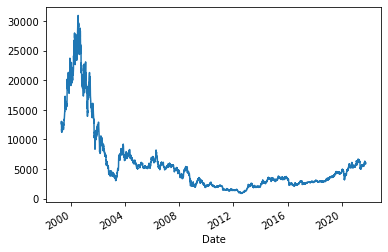

In [14]:
df.iloc[:,3].plot() #4列目 Closeだけをプロット 